In [22]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint
import seaborn as sns
from tensorflow.keras.models import load_model

In [2]:
# Paths
base_dir = r"D:\sem 7\Sem 8\HHH\FYP Final Codes\dataset_final"
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

In [3]:
# Parameters
img_size = (256, 256)
batch_size = 32
epochs = 50

In [4]:
# Data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_gen = train_datagen.flow_from_directory(train_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical')
val_gen = val_datagen.flow_from_directory(val_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical')
test_gen = test_datagen.flow_from_directory(test_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical', shuffle=False)

Found 592 images belonging to 3 classes.
Found 74 images belonging to 3 classes.
Found 75 images belonging to 3 classes.


In [6]:
# Load ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(train_gen.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
checkpoint = ModelCheckpoint(
    'best_model.h5',           # Save in root dir with this filename
    monitor='val_loss',        # Watch validation loss
    save_best_only=True,       # Save only if it's the best so far
    mode='min',                # Lower val_loss is better
    verbose=1                  # Print when saving
)


In [8]:

# Train model
#history = model.fit(train_gen, validation_data=val_gen, epochs=epochs)


# Learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=2, min_lr=1e-4)

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=epochs,
    callbacks=[lr_scheduler, checkpoint]
)

# Train model
#history = model.fit(train_gen, validation_data=val_gen, epochs=epochs, callbacks=[lr_scheduler])

Epoch 1/50


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3418 - loss: 1.3453
Epoch 1: val_loss improved from inf to 1.09009, saving model to best_model.h5


19/19 ━━━━━━━━━━━━━━━━━━━━ 55s 3s/step - accuracy: 0.3417 - loss: 1.3431 - val_accuracy: 0.3649 - val_loss: 1.0901 - learning_rate: 0.0010
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3373 - loss: 1.1360
Epoch 2: val_loss improved from 1.09009 to 1.06995, saving model to best_model.h5


19/19 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.3380 - loss: 1.1351 - val_accuracy: 0.4459 - val_loss: 1.0700 - learning_rate: 0.0010
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4431 - loss: 1.0399
Epoch 3: val_loss did not improve from 1.06995
19/19 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.4426 - loss: 1.0402 - val_accuracy: 0.3514 - val_loss: 1.1030 - learning_rate: 0.0010
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4385 - loss: 1.0471
Epoch 4: val_loss improved from 1.06995 to 1.05571, saving model to best_model.h5


19/19 ━━━━━━━━━━━━━━━━━━━━ 48s 3s/step - accuracy: 0.4386 - loss: 1.0472 - val_accuracy: 0.4595 - val_loss: 1.0557 - learning_rate: 0.0010
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4405 - loss: 1.0299
Epoch 5: val_loss improved from 1.05571 to 1.04878, saving model to best_model.h5


19/19 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.4414 - loss: 1.0295 - val_accuracy: 0.4054 - val_loss: 1.0488 - learning_rate: 0.0010
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4366 - loss: 1.0401
Epoch 6: val_loss did not improve from 1.04878
19/19 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.4379 - loss: 1.0394 - val_accuracy: 0.4054 - val_loss: 1.0669 - learning_rate: 0.0010
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4646 - loss: 1.0178
Epoch 7: val_loss improved from 1.04878 to 1.04646, saving model to best_model.h5


19/19 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.4647 - loss: 1.0174 - val_accuracy: 0.4324 - val_loss: 1.0465 - learning_rate: 0.0010
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4820 - loss: 1.0141
Epoch 8: val_loss improved from 1.04646 to 1.02835, saving model to best_model.h5


19/19 ━━━━━━━━━━━━━━━━━━━━ 49s 3s/step - accuracy: 0.4834 - loss: 1.0133 - val_accuracy: 0.4054 - val_loss: 1.0284 - learning_rate: 0.0010
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4867 - loss: 0.9900
Epoch 9: val_loss did not improve from 1.02835
19/19 ━━━━━━━━━━━━━━━━━━━━ 48s 3s/step - accuracy: 0.4870 - loss: 0.9901 - val_accuracy: 0.4459 - val_loss: 1.0351 - learning_rate: 0.0010
Epoch 10/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5080 - loss: 0.9928
Epoch 10: val_loss did not improve from 1.02835
19/19 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.5057 - loss: 0.9936 - val_accuracy: 0.3514 - val_loss: 1.0731 - learning_rate: 0.0010
Epoch 11/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5155 - loss: 0.9964
Epoch 11: val_loss improved from 1.02835 to 1.01725, saving model to best_model.h5


19/19 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.5158 - loss: 0.9963 - val_accuracy: 0.5405 - val_loss: 1.0172 - learning_rate: 8.0000e-04
Epoch 12/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5507 - loss: 0.9554
Epoch 12: val_loss did not improve from 1.01725
19/19 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.5501 - loss: 0.9554 - val_accuracy: 0.5405 - val_loss: 1.0267 - learning_rate: 8.0000e-04
Epoch 13/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5566 - loss: 0.9543
Epoch 13: val_loss did not improve from 1.01725
19/19 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.5562 - loss: 0.9541 - val_accuracy: 0.4189 - val_loss: 1.0269 - learning_rate: 8.0000e-04
Epoch 14/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5230 - loss: 0.9551
Epoch 14: val_loss improved from 1.01725 to 1.01306, saving model to best_model.h5


19/19 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.5230 - loss: 0.9552 - val_accuracy: 0.4189 - val_loss: 1.0131 - learning_rate: 6.4000e-04
Epoch 15/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5317 - loss: 0.9510
Epoch 15: val_loss did not improve from 1.01306
19/19 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.5324 - loss: 0.9504 - val_accuracy: 0.6351 - val_loss: 1.0369 - learning_rate: 6.4000e-04
Epoch 16/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5424 - loss: 0.9603
Epoch 16: val_loss improved from 1.01306 to 0.99258, saving model to best_model.h5


19/19 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.5428 - loss: 0.9597 - val_accuracy: 0.6757 - val_loss: 0.9926 - learning_rate: 6.4000e-04
Epoch 17/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5773 - loss: 0.9186
Epoch 17: val_loss improved from 0.99258 to 0.98466, saving model to best_model.h5


19/19 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.5771 - loss: 0.9185 - val_accuracy: 0.6351 - val_loss: 0.9847 - learning_rate: 6.4000e-04
Epoch 18/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5896 - loss: 0.9079
Epoch 18: val_loss improved from 0.98466 to 0.97815, saving model to best_model.h5


19/19 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.5900 - loss: 0.9077 - val_accuracy: 0.4459 - val_loss: 0.9782 - learning_rate: 6.4000e-04
Epoch 19/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6410 - loss: 0.8807
Epoch 19: val_loss did not improve from 0.97815
19/19 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.6389 - loss: 0.8819 - val_accuracy: 0.4730 - val_loss: 1.0118 - learning_rate: 6.4000e-04
Epoch 20/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5949 - loss: 0.8982
Epoch 20: val_loss did not improve from 0.97815
19/19 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.5956 - loss: 0.8982 - val_accuracy: 0.6486 - val_loss: 0.9789 - learning_rate: 6.4000e-04
Epoch 21/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6196 - loss: 0.8815
Epoch 21: val_loss improved from 0.97815 to 0.96219, saving model to best_model.h5


19/19 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.6186 - loss: 0.8819 - val_accuracy: 0.5946 - val_loss: 0.9622 - learning_rate: 5.1200e-04
Epoch 22/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5919 - loss: 0.9242
Epoch 22: val_loss improved from 0.96219 to 0.94926, saving model to best_model.h5


19/19 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.5932 - loss: 0.9223 - val_accuracy: 0.5946 - val_loss: 0.9493 - learning_rate: 5.1200e-04
Epoch 23/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6562 - loss: 0.8613
Epoch 23: val_loss improved from 0.94926 to 0.94559, saving model to best_model.h5


19/19 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.6559 - loss: 0.8614 - val_accuracy: 0.6486 - val_loss: 0.9456 - learning_rate: 5.1200e-04
Epoch 24/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6252 - loss: 0.8734
Epoch 24: val_loss did not improve from 0.94559
19/19 ━━━━━━━━━━━━━━━━━━━━ 49s 3s/step - accuracy: 0.6252 - loss: 0.8740 - val_accuracy: 0.6216 - val_loss: 0.9985 - learning_rate: 5.1200e-04
Epoch 25/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5963 - loss: 0.8933
Epoch 25: val_loss improved from 0.94559 to 0.93026, saving model to best_model.h5


19/19 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.5966 - loss: 0.8923 - val_accuracy: 0.6081 - val_loss: 0.9303 - learning_rate: 5.1200e-04
Epoch 26/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6701 - loss: 0.8381
Epoch 26: val_loss improved from 0.93026 to 0.92545, saving model to best_model.h5


19/19 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.6703 - loss: 0.8378 - val_accuracy: 0.6351 - val_loss: 0.9255 - learning_rate: 5.1200e-04
Epoch 27/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6733 - loss: 0.8376
Epoch 27: val_loss did not improve from 0.92545
19/19 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.6729 - loss: 0.8381 - val_accuracy: 0.6486 - val_loss: 0.9277 - learning_rate: 5.1200e-04
Epoch 28/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6271 - loss: 0.8247
Epoch 28: val_loss improved from 0.92545 to 0.90974, saving model to best_model.h5


19/19 ━━━━━━━━━━━━━━━━━━━━ 46s 3s/step - accuracy: 0.6279 - loss: 0.8251 - val_accuracy: 0.6486 - val_loss: 0.9097 - learning_rate: 5.1200e-04
Epoch 29/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6420 - loss: 0.8356
Epoch 29: val_loss improved from 0.90974 to 0.90799, saving model to best_model.h5


19/19 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.6418 - loss: 0.8348 - val_accuracy: 0.6622 - val_loss: 0.9080 - learning_rate: 5.1200e-04
Epoch 30/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6540 - loss: 0.8275
Epoch 30: val_loss improved from 0.90799 to 0.90154, saving model to best_model.h5


19/19 ━━━━━━━━━━━━━━━━━━━━ 49s 3s/step - accuracy: 0.6528 - loss: 0.8278 - val_accuracy: 0.5541 - val_loss: 0.9015 - learning_rate: 5.1200e-04
Epoch 31/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6603 - loss: 0.8147
Epoch 31: val_loss did not improve from 0.90154
19/19 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.6602 - loss: 0.8148 - val_accuracy: 0.5541 - val_loss: 0.9222 - learning_rate: 5.1200e-04
Epoch 32/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6404 - loss: 0.8105
Epoch 32: val_loss did not improve from 0.90154
19/19 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.6407 - loss: 0.8104 - val_accuracy: 0.6216 - val_loss: 0.9254 - learning_rate: 5.1200e-04
Epoch 33/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6889 - loss: 0.8058
Epoch 33: val_loss improved from 0.90154 to 0.87987, saving model to best_model.h5


19/19 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.6892 - loss: 0.8053 - val_accuracy: 0.6486 - val_loss: 0.8799 - learning_rate: 4.0960e-04
Epoch 34/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7068 - loss: 0.7658
Epoch 34: val_loss improved from 0.87987 to 0.87314, saving model to best_model.h5


19/19 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.7052 - loss: 0.7670 - val_accuracy: 0.6757 - val_loss: 0.8731 - learning_rate: 4.0960e-04
Epoch 35/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6906 - loss: 0.7941
Epoch 35: val_loss improved from 0.87314 to 0.87280, saving model to best_model.h5


19/19 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.6905 - loss: 0.7936 - val_accuracy: 0.6486 - val_loss: 0.8728 - learning_rate: 4.0960e-04
Epoch 36/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7121 - loss: 0.7600
Epoch 36: val_loss did not improve from 0.87280
19/19 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.7112 - loss: 0.7608 - val_accuracy: 0.6757 - val_loss: 0.8878 - learning_rate: 4.0960e-04
Epoch 37/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6805 - loss: 0.8027
Epoch 37: val_loss improved from 0.87280 to 0.85676, saving model to best_model.h5


19/19 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.6818 - loss: 0.8013 - val_accuracy: 0.6622 - val_loss: 0.8568 - learning_rate: 4.0960e-04
Epoch 38/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7039 - loss: 0.7873
Epoch 38: val_loss improved from 0.85676 to 0.84380, saving model to best_model.h5


19/19 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.7039 - loss: 0.7865 - val_accuracy: 0.7162 - val_loss: 0.8438 - learning_rate: 4.0960e-04
Epoch 39/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7293 - loss: 0.7725
Epoch 39: val_loss did not improve from 0.84380
19/19 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.7297 - loss: 0.7719 - val_accuracy: 0.7027 - val_loss: 0.8615 - learning_rate: 4.0960e-04
Epoch 40/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6771 - loss: 0.7495
Epoch 40: val_loss did not improve from 0.84380
19/19 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.6764 - loss: 0.7510 - val_accuracy: 0.5541 - val_loss: 0.8815 - learning_rate: 4.0960e-04
Epoch 41/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6735 - loss: 0.7632
Epoch 41: val_loss did not improve from 0.84380
19/19 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.6744 - loss: 0.7631 - val_accuracy: 0.6622 - val_loss: 0.8471 - learning_rate: 3.2768e-04
Epoch 42/50
19/19 ━━━━━━━━━━━━━━

19/19 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.6867 - loss: 0.7814 - val_accuracy: 0.6757 - val_loss: 0.8323 - learning_rate: 3.2768e-04
Epoch 43/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7343 - loss: 0.7303
Epoch 43: val_loss improved from 0.83231 to 0.82276, saving model to best_model.h5


19/19 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.7337 - loss: 0.7308 - val_accuracy: 0.6622 - val_loss: 0.8228 - learning_rate: 3.2768e-04
Epoch 44/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7131 - loss: 0.7209
Epoch 44: val_loss improved from 0.82276 to 0.82138, saving model to best_model.h5


19/19 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.7134 - loss: 0.7213 - val_accuracy: 0.7027 - val_loss: 0.8214 - learning_rate: 3.2768e-04
Epoch 45/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7330 - loss: 0.7068
Epoch 45: val_loss improved from 0.82138 to 0.81373, saving model to best_model.h5


19/19 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.7323 - loss: 0.7082 - val_accuracy: 0.6757 - val_loss: 0.8137 - learning_rate: 3.2768e-04
Epoch 46/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7603 - loss: 0.6968
Epoch 46: val_loss did not improve from 0.81373
19/19 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.7593 - loss: 0.6981 - val_accuracy: 0.7297 - val_loss: 0.8146 - learning_rate: 3.2768e-04
Epoch 47/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6886 - loss: 0.7265
Epoch 47: val_loss did not improve from 0.81373
19/19 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.6883 - loss: 0.7266 - val_accuracy: 0.6757 - val_loss: 0.8229 - learning_rate: 3.2768e-04
Epoch 48/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7589 - loss: 0.7068
Epoch 48: val_loss improved from 0.81373 to 0.80638, saving model to best_model.h5


19/19 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.7582 - loss: 0.7075 - val_accuracy: 0.6892 - val_loss: 0.8064 - learning_rate: 2.6214e-04
Epoch 49/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7537 - loss: 0.6888
Epoch 49: val_loss did not improve from 0.80638
19/19 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.7521 - loss: 0.6897 - val_accuracy: 0.6622 - val_loss: 0.8076 - learning_rate: 2.6214e-04
Epoch 50/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7555 - loss: 0.6861
Epoch 50: val_loss did not improve from 0.80638
19/19 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.7543 - loss: 0.6870 - val_accuracy: 0.6892 - val_loss: 0.8436 - learning_rate: 2.6214e-04


In [23]:
# Plot accuracy and loss
plt.figure(figsize=(14, 5))

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

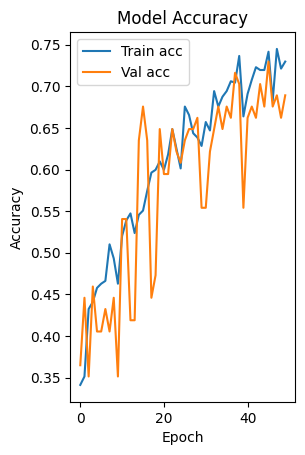

In [24]:
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train acc')
plt.plot(history.history['val_accuracy'], label='Val acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()                

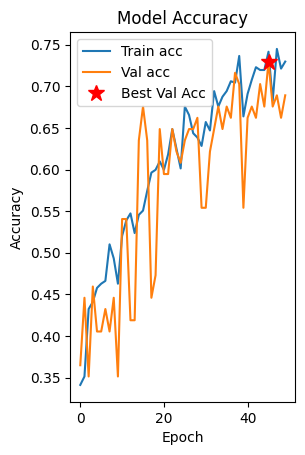

In [25]:
# Get best validation accuracy and its epoch
val_acc = history.history['val_accuracy']
best_epoch = np.argmax(val_acc)
best_val_acc = val_acc[best_epoch]

# Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train acc')
plt.plot(val_acc, label='Val acc')
plt.plot(best_epoch, best_val_acc, 'r*', markersize=12, label='Best Val Acc')  

plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


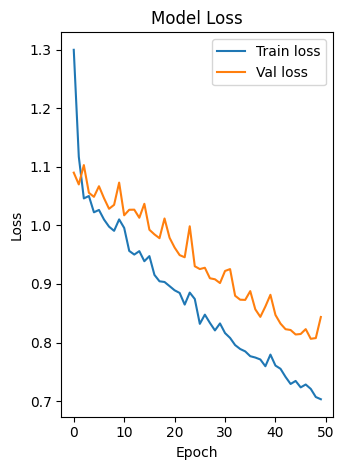

In [26]:
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [27]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(test_gen)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")

3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.7116 - loss: 0.7996

Test Accuracy: 72.00%


In [28]:
#Print test accuracy of our best model

best_model = load_model('best_model.h5')
test_loss, test_acc = best_model.evaluate(test_gen)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")

3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.7851 - loss: 0.7291

Test Accuracy: 77.33%


In [29]:
# Classification report
y_true = test_gen.classes
y_pred = model.predict(test_gen)
y_pred_classes = np.argmax(y_pred, axis=1)
class_labels = list(test_gen.class_indices.keys())

print("\nClassification Report:")

3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step

Classification Report:


In [30]:
#Classification report for the best model


y_pred_best = best_model.predict(test_gen)
y_pred_classes_best = np.argmax(y_pred_best, axis=1)

print("\nClassification Report (Best Model):")
print(classification_report(y_true, y_pred_classes_best, target_names=class_labels))


3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step

Classification Report (Best Model):
                precision    recall  f1-score   support

       healthy       0.68      0.76      0.72        25
   new_disease       0.78      0.84      0.81        25
powdery_mildew       0.90      0.72      0.80        25

      accuracy                           0.77        75
     macro avg       0.79      0.77      0.77        75
  weighted avg       0.79      0.77      0.77        75



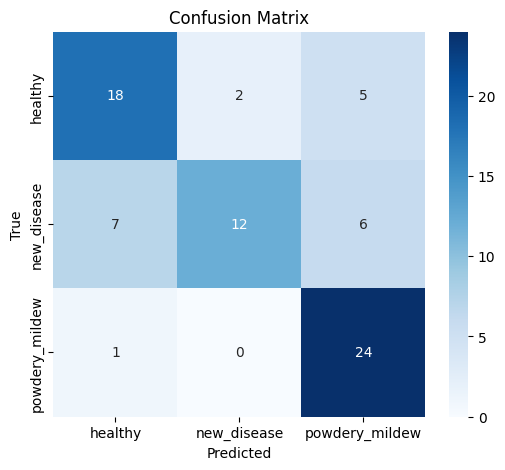

In [31]:
# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

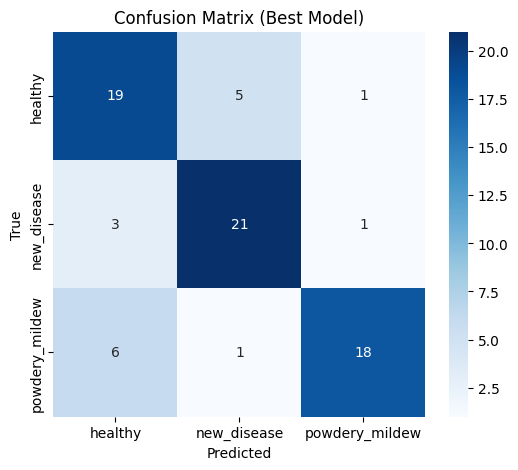

In [32]:
# Confusion matrix for best model
cm_best = confusion_matrix(y_true, y_pred_classes_best)

# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm_best, annot=True, fmt='d',
            xticklabels=class_labels, yticklabels=class_labels,
            cmap='Blues')

plt.title('Confusion Matrix (Best Model)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
